# Image Data Augmentation with Keras

![alt text](https://lh3.googleusercontent.com/GDYOU7-uiJB54tAv0WedSiNGL9urmprEd6PNtOf6b2SFMwwPgFGzlpzcwj_ILwxh-s7ywzI=s170)

# Task 1: Import Libraries

In [34]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.2.0-rc2


# Task 2: Rotation

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40 #iska matlab rotate to +40 se lekr -40 degree any value at random
)

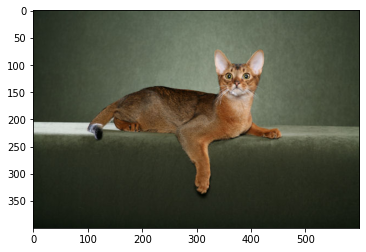

In [36]:
image_path = '/content/images/train/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 2 classes.


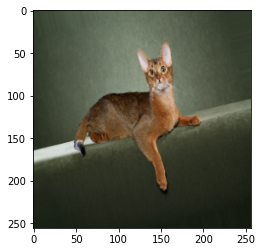

In [37]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-100,-50,0,50,100],#explicit values. randomly choose krega among these 5 values only 
    height_shift_range =[-50,0,50]
)
#new pixels generated ki value copy ki jati hai nearby pixel se tabhi agr dekho toh lines appear hongi at end of image

Found 1 images belonging to 2 classes.


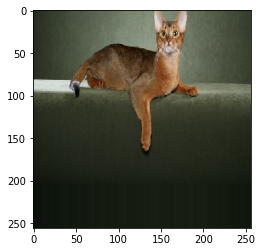

In [39]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 2 classes.


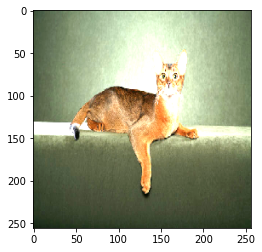

In [40]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5,2.0) #range specify ki hai any value form half brightness to double brightness
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 2 classes.


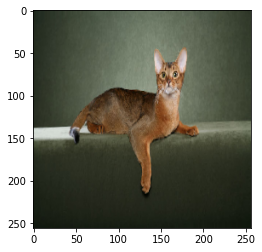

In [41]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 2 classes.


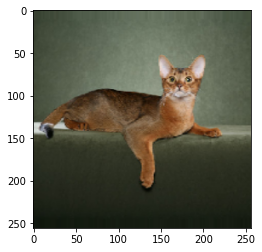

In [42]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5,1.2]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 2 classes.


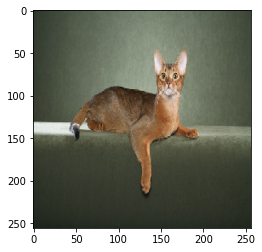

In [43]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100 #-100 to +100 will be added to rgb values 
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [44]:
x.mean() #new mean of values

85.42756

In [45]:
np.array(Image.open(image_path)).mean()#actual mean

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 2 classes.


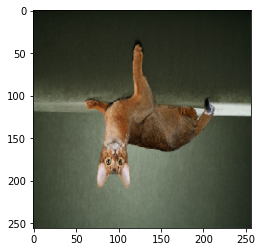

In [46]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True #kuch bhi ho skta hai randomly kabhi horizontal kabhi vertical kabhi dono kabhi koi bhi nhi
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()#cifar10 dataset load kiya hai
x_mean=x_train.mean()
x_std=x_train.std()
x_train_nom = (x_train-x_mean)/x_std
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

In [48]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.1390857 0.52539456 [[0]]
120.70756512369792


### Samplewise

In [49]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

2.483527e-09 1.0 [[0]]


# Task 10: Rescale and Preprocessing Function

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [0]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [52]:
print(x.mean(), x.std(), y)

-0.2896446 0.37188578 [[8]]


# Task 11: Using in Model Training

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [54]:
model=tf.keras.models.Sequential([
                                  tf.keras.applications.mobilenet_v2.MobileNetV2(
                                      include_top=False,
                                      input_shape = (32,32,3),
                                      pooling="avg"
                                  ),tf.keras.layers.Dense(10,activation="softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [56]:
final_model=model.fit(
    generator.flow(x_train,y_train,batch_size=32),
    epochs = 1, steps_per_epoch =10
)

10/10 [==============================] - 2s 209ms/step - loss: 3.0323 - accuracy: 0.0625
